In [3]:
# This notebook graphs the correlation betwen debt and unemployment over time for each country in the IMF.
# Overall, there is a postive correlation between debt and unemployment.

In [ ]:
import pandas as pd
import numpy as np

WEO = pd.read_excel("E:\Downloads\Data Incubator\IMF\WEOApr2018all.xlsx")

In [147]:
debt = WEO[WEO['WEO Subject Code'] == 'GGXWDG_NGDP']
unemploy = WEO[WEO['WEO Subject Code'] == 'LUR']

In [171]:
r_count = np.zeros(len(debt))-100
countries = debt['Country'].unique()

for i in range(0,len(countries)):
    country = countries[i]
    c_debt = debt[debt['Country'] == country]
    d_debt = c_debt.iloc[:, 9:36]
    c_unemploy = unemploy[unemploy['Country'] == country]
    d_unemploy = c_unemploy.iloc[:, 9:36]
    de_un = pd.concat([d_debt, d_unemploy],keys=['de', 'un'])
    de_un[de_un==0] = np.nan
    de_un = de_un.dropna(axis=1, how='any')
    de_val = np.float32(de_un[0:1].values)
    un_val = np.float32(de_un[1:2].values)
    if (de_val.size> 9) & (un_val.size> 9):
        r_val= np.corrcoef(de_val,un_val)
        r_count[i] = r_val[0,1]
r_count = r_count[~np.isnan(r_count)]
r_count = r_count[~(r_count==-100)]
print(r_count)

[ 0.6403817   0.67377897  0.3098204   0.88005717  0.82241659 -0.30426032
 -0.37397162 -0.05442757  0.33390148  0.08909057 -0.32705147  0.95805055
  0.94656194  0.24963935  0.77679479  0.60883442  0.79453769 -0.23421194
 -0.31902504  0.02700949  0.14303426  0.91683962  0.58041705  0.88402317
  0.87386973  0.00615736  0.89311653  0.82192303 -0.47123521  0.96080104
  0.59251639  0.93389792  0.01359881  0.34574212  0.16877     0.33553213
  0.81726883  0.95752158  0.21271698  0.352032    0.94987566  0.43020462
  0.36624682  0.55306765  0.08332391  0.24557557  0.47364435  0.51343663
  0.47625529  0.09081041  0.73163901 -0.38107879  0.94643381  0.80513433
 -0.67803048  0.37959618 -0.14126432 -0.21809405  0.28529888  0.88166832
  0.56617269  0.66182608  0.77510768  0.93884263  0.86984786  0.94799147
  0.27718276]


In [203]:
print(np.mean(r_count))

0.427868439533


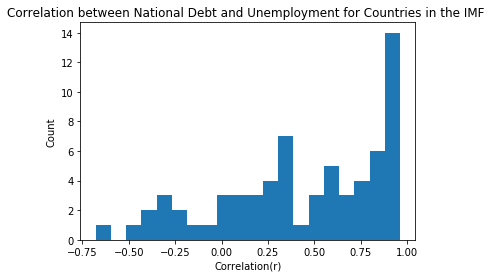

In [202]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# the histogram of the data
plt.hist(r_count, bins=20)

plt.xlabel('Correlation(r)')
plt.ylabel('Count')
plt.title('Correlation between National Debt and Unemployment for Countries in the IMF ')

plt.show()